In [133]:
import pandas as pd 
from pandas_datareader import data
import numpy as np 
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [134]:
stock=['RCI-B.TO','BCE.TO','T','SJR-B.TO','T.TO']
assets=['ROGERS','BELL', 'AT&T', 'SHAW', 'TELUS']
df = pd.DataFrame()
n_assets=len(stock)
for i in range(n_assets):
    df[assets[i]]=data.DataReader(stock[i], data_source='yahoo',start='2016-01-01', end='2018-01-01')['Adj Close']
df.head()

,ROGERS,BELL,AT&T,SHAW,TELUS
2016-01-04,41.103767,41.919941,25.882252,19.184690,15.335289
2016-01-05,41.945251,42.397026,26.063091,19.009119,15.403932
2016-01-06,41.438644,42.788067,26.024885,18.961239,15.222233
2016-01-07,40.940632,42.138935,25.604637,18.745770,15.230311
2016-01-08,41.215401,42.397026,25.627558,18.626066,15.109179


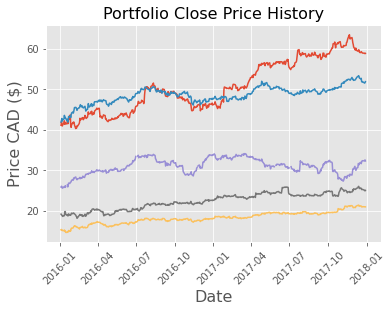

<Figure size 1440x1080 with 0 Axes>

In [135]:
for c in df.columns.values:
    plt.plot(df[c],label=c)

plt.title('Portfolio Close Price History',fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price CAD ($)',fontsize=16)
plt.figure(figsize=(20,15))
plt.show()

In [136]:
returns=np.log(df/df.shift(1))
returns.head()

,ROGERS,BELL,AT&T,SHAW,TELUS
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.020265,0.011317,0.006963,-0.009194,0.004466
2016-01-06,-0.012151,0.009181,-0.001467,-0.002522,-0.011866
2016-01-07,-0.012091,-0.015287,-0.016280,-0.011429,0.000531
2016-01-08,0.006689,0.006106,0.000895,-0.006406,-0.007985


In [137]:
np.random.seed(34)
trials=5000

weights=np.zeros((trials,len(df.columns)))
ret=np.zeros(trials)
var=np.zeros(trials)
vol=np.zeros(trials)
sharpe=np.zeros(trials)

for x in range(trials):
    w = np.array(np.random.random(5))
    w=w/np.sum(w)
    weights[x,:]=w
    ret[x]=np.sum((returns.mean() * w * 253))
    vol[x]=np.sqrt(np.dot(w.T,np.dot(returns.cov()*253,w)))
    sharpe[x]=ret[x]/vol[x]


In [129]:
max_indx = sharpe.argmax()
max_sharpe = sharpe.max()
ideal_return=ret[max_indx]
ideal_vol=vol[max_indx]

Result of the weights [0.28376189 0.10093669 0.32652642 0.10862637 0.18014863]


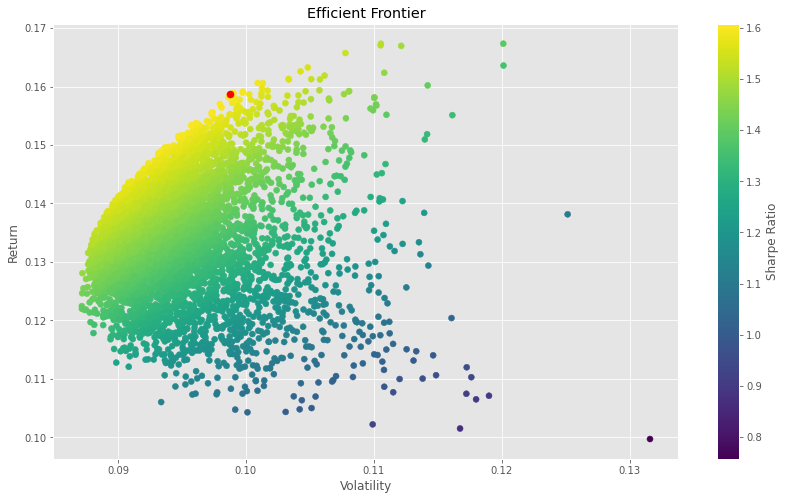

In [130]:
plt.figure(figsize=(14,8))
plt.scatter(vol, ret, c=sharpe,cmap='viridis')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(ideal_vol,ideal_return,c='red',s=50)
print(f'Result of the weights {w}')
plt.show()